<h2>Coding A Neural Network 2: Image Classification</h2>

<h3>Step 1: Load the Libraries</h3>

In [2]:
import keras                               # deep learning package
from keras.datasets import mnist           # dataset we will use to train our model
from keras.layers import Dense             # Dense describes how the layers are connected
from keras.models import Sequential        # Sequential means we are creating a sequence of connected layers
from keras.optimizers import SGD           # Sochastic gradient descent is the method used to find local minimum
import matplotlib.pyplot as plt            # visualize images
from keras.preprocessing import image      # preprocess images
from PIL import ImageOps                      # preprocess images

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<h3>Step 2: Obtain Data</h3>

In [3]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()
train_x = train_x.astype('float32') / 255                 #optional (you can rescale the RBG for each pixel)
test_x = test_x.astype('float32') / 255                   #optional (you can rescale the RBG for each pixel)
print(train_x.shape)                                       #let us view the dimensions of the train set
print(train_y.shape)                                       #let us view the dimentions of the train label
print(test_x.shape)                                        #view the dimensions of the test set
print(test_y.shape)                                        #view the dimensions of the test label

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
#look at the type of data stored in one image (there is 6000 of them!)
train_x[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
train_x = train_x.reshape(60000,784)                #reduce dimensions from 28x28 to 1x784
test_x = test_x.reshape(10000,784)                  #reduce dimensions from 28x28 to 1x784
train_y = keras.utils.to_categorical(train_y,10)    #convert y label to categorical with 10 possible outputs
test_y = keras.utils.to_categorical(test_y,10)      #convert y label to categorical with 10 possible outputs
print(train_x.shape)                                #view the new shape of training set
print(train_y.shape)                                #view the new shape of training label
print(test_x.shape)                                 #view the new shape of the test set
print(test_y.shape)                                 #view the new shape of the test label

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [6]:
train_x[1] #view the content of one reshaped image. How is it different from before?


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3>Step 4: Define Your Model</h3>

In [7]:
model = Sequential()                                               #explain sequential 
model.add(Dense(units=128,activation="relu",input_shape=(784,)))   #first layer
model.add(Dense(units=128,activation="relu"))                      #second layer
model.add(Dense(units=128,activation="relu"))                      #third layer
model.add(Dense(units=10,activation="softmax"))                    #output layer


<h3>Step 5: Compile Your Model</h3>

In [8]:
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])

#what is SGD?
#what is lr?
#what is loss?

<h3>Step 6: Fit Your Model</h3>

In [9]:
model.fit(train_x,train_y,batch_size=32,epochs=20,verbose=1)
#train_x: Your training dataset
#train_y: Your training label
#epochs:       one forward pass and one backward pass of all the training examples
#batch_size:   the number of training examples in one forward/backward pass
#verbose: display log on screen

Epoch 1/20
   32/60000 [..............................] - ETA: 5:04 - loss: 2.3004 - acc: 0.0938

  288/60000 [..............................] - ETA: 44s - loss: 2.3438 - acc: 0.0799 

  608/60000 [..............................] - ETA: 28s - loss: 2.3322 - acc: 0.0905

 1088/60000 [..............................] - ETA: 21s - loss: 2.3299 - acc: 0.0956

 1536/60000 [..............................] - ETA: 18s - loss: 2.3297 - acc: 0.0931

 2016/60000 [>.............................] - ETA: 17s - loss: 2.3262 - acc: 0.0947

 2400/60000 [>.............................] - ETA: 16s - loss: 2.3263 - acc: 0.0904

 2880/60000 [>.............................] - ETA: 15s - loss: 2.3245 - acc: 0.0896

 3360/60000 [>.............................] - ETA: 15s - loss: 2.3219 - acc: 0.0920

 3872/60000 [>.............................] - ETA: 14s - loss: 2.3229 - acc: 0.0930

 4384/60000 [=>............................] - ETA: 13s - loss: 2.3176 - acc: 0.0997

 4864/60000 [=>............................] - ETA: 13s - loss: 2.3159 - acc: 0.1001

 5216/60000 [=>............................] - ETA: 13s - loss: 2.3140 - acc: 0.1043

 5632/60000 [=>............................] - ETA: 13s - loss: 2.3117 - acc: 0.1058

 6144/60000 [==>...........................] - ETA: 13s - loss: 2.3099 - acc: 0.1090

 6592/60000 [==>...........................] - ETA: 12s - loss: 2.3077 - acc: 0.1130

 6688/60000 [==>...........................] - ETA: 12s - loss: 2.3074 - acc: 0.1139

 7104/60000 [==>...........................] - ETA: 12s - loss: 2.3056 - acc: 0.1153

 7264/60000 [==>...........................] - ETA: 12s - loss: 2.3055 - acc: 0.1154

 7712/60000 [==>...........................] - ETA: 12s - loss: 2.3038 - acc: 0.1171

 8192/60000 [===>..........................] - ETA: 11s - loss: 2.3025 - acc: 0.1183

 8224/60000 [===>..........................] - ETA: 11s - loss: 2.3025 - acc: 0.1184

 8608/60000 [===>..........................] - ETA: 11s - loss: 2.3010 - acc: 0.1202

 9024/60000 [===>..........................] - ETA: 11s - loss: 2.2993 - acc: 0.1237

 9152/60000 [===>..........................] - ETA: 11s - loss: 2.2986 - acc: 0.1240

 9696/60000 [===>..........................] - ETA: 11s - loss: 2.2967 - acc: 0.1274

10144/60000 [====>.........................] - ETA: 11s - loss: 2.2944 - acc: 0.1316

10272/60000 [====>.........................] - ETA: 11s - loss: 2.2938 - acc: 0.1334

10624/60000 [====>.........................] - ETA: 11s - loss: 2.2922 - acc: 0.1356

11072/60000 [====>.........................] - ETA: 10s - loss: 2.2906 - acc: 0.1368

11104/60000 [====>.........................] - ETA: 11s - loss: 2.2904 - acc: 0.1372

11680/60000 [====>.........................] - ETA: 10s - loss: 2.2885 - acc: 0.1396

12160/60000 [=====>........................] - ETA: 10s - loss: 2.2867 - acc: 0.1421

12192/60000 [=====>........................] - ETA: 10s - loss: 2.2866 - acc: 0.1421

12544/60000 [=====>........................] - ETA: 10s - loss: 2.2854 - acc: 0.1446

13024/60000 [=====>........................] - ETA: 10s - loss: 2.2835 - acc: 0.1467

13504/60000 [=====>........................] - ETA: 10s - loss: 2.2815 - acc: 0.1499

13888/60000 [=====>........................] - ETA: 10s - loss: 2.2798 - acc: 0.1519

14336/60000 [======>.......................] - ETA: 10s - loss: 2.2780 - acc: 0.1550

14944/60000 [======>.......................] - ETA: 9s - loss: 2.2758 - acc: 0.1580 

15488/60000 [======>.......................] - ETA: 9s - loss: 2.2740 - acc: 0.1612

16064/60000 [=======>......................] - ETA: 9s - loss: 2.2721 - acc: 0.1645

16672/60000 [=======>......................] - ETA: 9s - loss: 2.2696 - acc: 0.1686

17280/60000 [=======>......................] - ETA: 9s - loss: 2.2676 - acc: 0.1723

17888/60000 [=======>......................] - ETA: 8s - loss: 2.2659 - acc: 0.1750

18400/60000 [========>.....................] - ETA: 8s - loss: 2.2641 - acc: 0.1776

19008/60000 [========>.....................] - ETA: 8s - loss: 2.2621 - acc: 0.1809

19616/60000 [========>.....................] - ETA: 8s - loss: 2.2605 - acc: 0.1838

20032/60000 [=========>....................] - ETA: 8s - loss: 2.2592 - acc: 0.1860

20640/60000 [=========>....................] - ETA: 8s - loss: 2.2571 - acc: 0.1891

21216/60000 [=========>....................] - ETA: 8s - loss: 2.2549 - acc: 0.1926

21824/60000 [=========>....................] - ETA: 7s - loss: 2.2529 - acc: 0.1957

22432/60000 [==========>...................] - ETA: 7s - loss: 2.2508 - acc: 0.1999

23008/60000 [==========>...................] - ETA: 7s - loss: 2.2489 - acc: 0.2031

23616/60000 [==========>...................] - ETA: 7s - loss: 2.2469 - acc: 0.2059

24224/60000 [===========>..................] - ETA: 7s - loss: 2.2444 - acc: 0.2100

24640/60000 [===========>..................] - ETA: 7s - loss: 2.2428 - acc: 0.2129

24736/60000 [===========>..................] - ETA: 7s - loss: 2.2424 - acc: 0.2135

25248/60000 [===========>..................] - ETA: 7s - loss: 2.2406 - acc: 0.2166

25856/60000 [===========>..................] - ETA: 6s - loss: 2.2385 - acc: 0.2203

26272/60000 [============>.................] - ETA: 6s - loss: 2.2372 - acc: 0.2217

26816/60000 [============>.................] - ETA: 6s - loss: 2.2353 - acc: 0.2246

27392/60000 [============>.................] - ETA: 6s - loss: 2.2333 - acc: 0.2279

27936/60000 [============>.................] - ETA: 6s - loss: 2.2315 - acc: 0.2310

28544/60000 [=============>................] - ETA: 6s - loss: 2.2295 - acc: 0.2344

29152/60000 [=============>................] - ETA: 6s - loss: 2.2274 - acc: 0.2372

29696/60000 [=============>................] - ETA: 6s - loss: 2.2252 - acc: 0.2402

30208/60000 [==============>...............] - ETA: 5s - loss: 2.2232 - acc: 0.2429

30592/60000 [==============>...............] - ETA: 5s - loss: 2.2216 - acc: 0.2456

31008/60000 [==============>...............] - ETA: 5s - loss: 2.2199 - acc: 0.2482



31552/60000 [==============>...............] - ETA: 5s - loss: 2.2177 - acc: 0.2517

…

13536/60000 [=====>........................] - ETA: 7s - loss: 0.2712 - acc: 0.9238

14048/60000 [======>.......................] - ETA: 7s - loss: 0.2730 - acc: 0.9235

14208/60000 [======>.......................] - ETA: 7s - loss: 0.2726 - acc: 0.9236

14816/60000 [======>.......................] - ETA: 7s - loss: 0.2711 - acc: 0.9241

15456/60000 [======>.......................] - ETA: 7s - loss: 0.2688 - acc: 0.9247

15488/60000 [======>.......................] - ETA: 7s - loss: 0.2689 - acc: 0.9247

16096/60000 [=======>......................] - ETA: 7s - loss: 0.2684 - acc: 0.9245

16672/60000 [=======>......................] - ETA: 7s - loss: 0.2682 - acc: 0.9244

17312/60000 [=======>......................] - ETA: 7s - loss: 0.2693 - acc: 0.9240

17920/60000 [=======>......................] - ETA: 6s - loss: 0.2712 - acc: 0.9242

18528/60000 [========>.....................] - ETA: 6s - loss: 0.2708 - acc: 0.9241

19168/60000 [========>.....................] - ETA: 6s - loss: 0.2709 - acc: 0.9241

19808/60000 [========>.....................] - ETA: 6s - loss: 0.2719 - acc: 0.9240

20384/60000 [=========>....................] - ETA: 6s - loss: 0.2703 - acc: 0.9242

20992/60000 [=========>....................] - ETA: 6s - loss: 0.2719 - acc: 0.9238

21600/60000 [=========>....................] - ETA: 6s - loss: 0.2723 - acc: 0.9237

21664/60000 [=========>....................] - ETA: 6s - loss: 0.2719 - acc: 0.9237

22304/60000 [==========>...................] - ETA: 6s - loss: 0.2717 - acc: 0.9238

22976/60000 [==========>...................] - ETA: 6s - loss: 0.2724 - acc: 0.9237

23616/60000 [==========>...................] - ETA: 5s - loss: 0.2724 - acc: 0.9234

24288/60000 [===========>..................] - ETA: 5s - loss: 0.2724 - acc: 0.9232

24896/60000 [===========>..................] - ETA: 5s - loss: 0.2717 - acc: 0.9235

24960/60000 [===========>..................] - ETA: 5s - loss: 0.2717 - acc: 0.9235

25440/60000 [===========>..................] - ETA: 5s - loss: 0.2709 - acc: 0.9238

25600/60000 [===========>..................] - ETA: 5s - loss: 0.2711 - acc: 0.9239

26144/60000 [============>.................] - ETA: 5s - loss: 0.2711 - acc: 0.9239

26400/60000 [============>.................] - ETA: 5s - loss: 0.2710 - acc: 0.9240

26816/60000 [============>.................] - ETA: 5s - loss: 0.2710 - acc: 0.9239

27424/60000 [============>.................] - ETA: 5s - loss: 0.2697 - acc: 0.9242

28000/60000 [=============>................] - ETA: 5s - loss: 0.2692 - acc: 0.9242

28064/60000 [=============>................] - ETA: 5s - loss: 0.2694 - acc: 0.9241

28704/60000 [=============>................] - ETA: 5s - loss: 0.2697 - acc: 0.9242

28768/60000 [=============>................] - ETA: 5s - loss: 0.2696 - acc: 0.9242

29376/60000 [=============>................] - ETA: 4s - loss: 0.2690 - acc: 0.9242

30016/60000 [==============>...............] - ETA: 4s - loss: 0.2685 - acc: 0.9244

30048/60000 [==============>...............] - ETA: 4s - loss: 0.2690 - acc: 0.9243

30688/60000 [==============>...............] - ETA: 4s - loss: 0.2704 - acc: 0.9237

31328/60000 [==============>...............] - ETA: 4s - loss: 0.2703 - acc: 0.9238

31936/60000 [==============>...............] - ETA: 4s - loss: 0.2693 - acc: 0.9240

32576/60000 [===============>..............] - ETA: 4s - loss: 0.2687 - acc: 0.9238

33248/60000 [===============>..............] - ETA: 4s - loss: 0.2687 - acc: 0.9238

33888/60000 [===============>..............] - ETA: 4s - loss: 0.2686 - acc: 0.9237

34528/60000 [================>.............] - ETA: 4s - loss: 0.2685 - acc: 0.9236

35232/60000 [================>.............] - ETA: 3s - loss: 0.2685 - acc: 0.9236

35840/60000 [================>.............] - ETA: 3s - loss: 0.2684 - acc: 0.9234

35872/60000 [================>.............] - ETA: 3s - loss: 0.2683 - acc: 0.9235

36480/60000 [=================>............] - ETA: 3s - loss: 0.2686 - acc: 0.9234

37152/60000 [=================>............] - ETA: 3s - loss: 0.2685 - acc: 0.9234

37792/60000 [=================>............] - ETA: 3s - loss: 0.2689 - acc: 0.9233

38432/60000 [==================>...........] - ETA: 3s - loss: 0.2697 - acc: 0.9231

39072/60000 [==================>...........] - ETA: 3s - loss: 0.2699 - acc: 0.9231

39712/60000 [==================>...........] - ETA: 3s - loss: 0.2705 - acc: 0.9228

40320/60000 [===================>..........] - ETA: 3s - loss: 0.2706 - acc: 0.9226

40352/60000 [===================>..........] - ETA: 3s - loss: 0.2705 - acc: 0.9226

40992/60000 [===================>..........] - ETA: 3s - loss: 0.2708 - acc: 0.9225

41600/60000 [===================>..........] - ETA: 2s - loss: 0.2705 - acc: 0.9225

41632/60000 [===================>..........] - ETA: 2s - loss: 0.2706 - acc: 0.9224

42240/60000 [====================>.........] - ETA: 2s - loss: 0.2708 - acc: 0.9226

42912/60000 [====================>.........] - ETA: 2s - loss: 0.2701 - acc: 0.9227

43552/60000 [====================>.........] - ETA: 2s - loss: 0.2701 - acc: 0.9227

44192/60000 [=====================>........] - ETA: 2s - loss: 0.2700 - acc: 0.9228

44832/60000 [=====================>........] - ETA: 2s - loss: 0.2692 - acc: 0.9230

45376/60000 [=====================>........] - ETA: 2s - loss: 0.2681 - acc: 0.9233

45472/60000 [=====================>........] - ETA: 2s - loss: 0.2680 - acc: 0.9234

46080/60000 [======================>.......] - ETA: 2s - loss: 0.2673 - acc: 0.9234

46720/60000 [======================>.......] - ETA: 2s - loss: 0.2673 - acc: 0.9234

47360/60000 [======================>.......] - ETA: 2s - loss: 0.2673 - acc: 0.9234

48000/60000 [=======================>......] - ETA: 1s - loss: 0.2673 - acc: 0.9234

48672/60000 [=======================>......] - ETA: 1s - loss: 0.2675 - acc: 0.9234

49280/60000 [=======================>......] - ETA: 1s - loss: 0.2680 - acc: 0.9233

49952/60000 [=======================>......] - ETA: 1s - loss: 0.2682 - acc: 0.9231

50592/60000 [========================>.....] - ETA: 1s - loss: 0.2683 - acc: 0.9232

51200/60000 [========================>.....] - ETA: 1s - loss: 0.2681 - acc: 0.9233

51232/60000 [========================>.....] - ETA: 1s - loss: 0.2681 - acc: 0.9233

51776/60000 [========================>.....] - ETA: 1s - loss: 0.2681 - acc: 0.9233

51904/60000 [========================>.....] - ETA: 1s - loss: 0.2680 - acc: 0.9232

52448/60000 [=========================>....] - ETA: 1s - loss: 0.2676 - acc: 0.9233

52992/60000 [=========================>....] - ETA: 1s - loss: 0.2675 - acc: 0.9233

53088/60000 [=========================>....] - ETA: 1s - loss: 0.2675 - acc: 0.9233

53632/60000 [=========================>....] - ETA: 1s - loss: 0.2676 - acc: 0.9233

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2677 - acc: 0.9233

54336/60000 [==========================>...] - ETA: 0s - loss: 0.2675 - acc: 0.9233

54848/60000 [==========================>...] - ETA: 0s - loss: 0.2673 - acc: 0.9233

54976/60000 [==========================>...] - ETA: 0s - loss: 0.2673 - acc: 0.9234

55616/60000 [==========================>...] - ETA: 0s - loss: 0.2676 - acc: 0.9232

55648/60000 [==========================>...] - ETA: 0s - loss: 0.2676 - acc: 0.9233

56224/60000 [===========================>..] - ETA: 0s - loss: 0.2668 - acc: 0.9236

56768/60000 [===========================>..] - ETA: 0s - loss: 0.2671 - acc: 0.9235

56864/60000 [===========================>..] - ETA: 0s - loss: 0.2673 - acc: 0.9234

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2672 - acc: 0.9235

57472/60000 [===========================>..] - ETA: 0s - loss: 0.2670 - acc: 0.9235

58048/60000 [============================>.] - ETA: 0s - loss: 0.2673 - acc: 0.9235

58592/60000 [============================>.] - ETA: 0s - loss: 0.2671 - acc: 0.9237

59168/60000 [============================>.] - ETA: 0s - loss: 0.2671 - acc: 0.9237

59744/60000 [============================>.] - ETA: 0s - loss: 0.2668 - acc: 0.9238

59808/60000 [============================>.] - ETA: 0s - loss: 0.2668 - acc: 0.9238

60000/60000 [==============================] - 10s 160us/step - loss: 0.2666 - acc: 0.9239


Epoch 16/20
   32/60000 [..............................] - ETA: 8s - loss: 0.0665 - acc: 1.0000

  352/60000 [..............................] - ETA: 13s - loss: 0.1846 - acc: 0.9602

  992/60000 [..............................] - ETA: 10s - loss: 0.2283 - acc: 0.9425

 1632/60000 [..............................] - ETA: 10s - loss: 0.2409 - acc: 0.9387

 2272/60000 [>.............................] - ETA: 9s - loss: 0.2546 - acc: 0.9305 

 2912/60000 [>.............................] - ETA: 9s - loss: 0.2558 - acc: 0.9289

 3520/60000 [>.............................] - ETA: 9s - loss: 0.2554 - acc: 0.9287

 4128/60000 [=>............................] - ETA: 9s - loss: 0.2543 - acc: 0.9288

 4768/60000 [=>............................] - ETA: 9s - loss: 0.2549 - acc: 0.9293

 5408/60000 [=>............................] - ETA: 8s - loss: 0.2541 - acc: 0.9286

 5920/60000 [=>............................] - ETA: 8s - loss: 0.2521 - acc: 0.9296

 6176/60000 [==>...........................] - ETA: 9s - loss: 0.2540 - acc: 0.9288

 6688/60000 [==>...........................] - ETA: 9s - loss: 0.2529 - acc: 0.9284

 7296/60000 [==>...........................] - ETA: 9s - loss: 0.2524 - acc: 0.9286

 7936/60000 [==>...........................] - ETA: 9s - loss: 0.2492 - acc: 0.9296

 8576/60000 [===>..........................] - ETA: 8s - loss: 0.2508 - acc: 0.9285

 9216/60000 [===>..........................] - ETA: 8s - loss: 0.2532 - acc: 0.9278

 9856/60000 [===>..........................] - ETA: 8s - loss: 0.2542 - acc: 0.9270

10368/60000 [====>.........................] - ETA: 8s - loss: 0.2540 - acc: 0.9270

10560/60000 [====>.........................] - ETA: 8s - loss: 0.2538 - acc: 0.9269

11104/60000 [====>.........................] - ETA: 8s - loss: 0.2536 - acc: 0.9271

11744/60000 [====>.........................] - ETA: 8s - loss: 0.2528 - acc: 0.9270

12288/60000 [=====>........................] - ETA: 8s - loss: 0.2539 - acc: 0.9264

12928/60000 [=====>........................] - ETA: 7s - loss: 0.2571 - acc: 0.9254

13568/60000 [=====>........................] - ETA: 7s - loss: 0.2567 - acc: 0.9256

14208/60000 [======>.......................] - ETA: 7s - loss: 0.2567 - acc: 0.9255

14848/60000 [======>.......................] - ETA: 7s - loss: 0.2586 - acc: 0.9253

15488/60000 [======>.......................] - ETA: 7s - loss: 0.2580 - acc: 0.9255

16096/60000 [=======>......................] - ETA: 7s - loss: 0.2580 - acc: 0.9254

16736/60000 [=======>......................] - ETA: 7s - loss: 0.2576 - acc: 0.9257

17376/60000 [=======>......................] - ETA: 7s - loss: 0.2574 - acc: 0.9256

17984/60000 [=======>......................] - ETA: 6s - loss: 0.2574 - acc: 0.9258

18432/60000 [========>.....................] - ETA: 6s - loss: 0.2587 - acc: 0.9256

18624/60000 [========>.....................] - ETA: 6s - loss: 0.2581 - acc: 0.9260

19168/60000 [========>.....................] - ETA: 6s - loss: 0.2579 - acc: 0.9261

19712/60000 [========>.....................] - ETA: 6s - loss: 0.2582 - acc: 0.9257

19776/60000 [========>.....................] - ETA: 6s - loss: 0.2586 - acc: 0.9257

20416/60000 [=========>....................] - ETA: 6s - loss: 0.2586 - acc: 0.9255

21056/60000 [=========>....................] - ETA: 6s - loss: 0.2574 - acc: 0.9261

21664/60000 [=========>....................] - ETA: 6s - loss: 0.2579 - acc: 0.9257

21760/60000 [=========>....................] - ETA: 6s - loss: 0.2574 - acc: 0.9259

22336/60000 [==========>...................] - ETA: 6s - loss: 0.2574 - acc: 0.9259

22944/60000 [==========>...................] - ETA: 6s - loss: 0.2582 - acc: 0.9258

23552/60000 [==========>...................] - ETA: 5s - loss: 0.2580 - acc: 0.9260

23584/60000 [==========>...................] - ETA: 5s - loss: 0.2586 - acc: 0.9258

24192/60000 [===========>..................] - ETA: 5s - loss: 0.2583 - acc: 0.9260

24800/60000 [===========>..................]

 - ETA: 5s - loss: 0.2575 - acc: 0.9261

24832/60000 [===========>..................] - ETA: 5s - loss: 0.2574 - acc: 0.9262

25408/60000 [===========>..................] - ETA: 5s - loss: 0.2579 - acc: 0.9259

26048/60000 [============>.................] - ETA: 5s - loss: 0.2578 - acc: 0.9262

26656/60000 [============>.................] - ETA: 5s - loss: 0.2569 - acc: 0.9264

27296/60000 [============>.................] - ETA: 5s - loss: 0.2573 - acc: 0.9260

27904/60000 [============>.................] - ETA: 5s - loss: 0.2564 - acc: 0.9264

28544/60000 [=============>................] - ETA: 5s - loss: 0.2562 - acc: 0.9265

29152/60000 [=============>................] - ETA: 5s - loss: 0.2559 - acc: 0.9265

29760/60000 [=============>................] - ETA: 4s - loss: 0.2568 - acc: 0.9264

29792/60000 [=============>................] - ETA: 4s - loss: 0.2567 - acc: 0.9265

30400/60000 [==============>...............] - ETA: 4s - loss: 0.2572 - acc: 0.9262

31040/60000 [==============>...............] - ETA: 4s - loss: 0.2569 - acc: 0.9264

31648/60000 [==============>...............] - ETA: 4s - loss: 0.2578 - acc: 0.9259

32192/60000 [===============>..............] - ETA: 4s - loss: 0.2582 - acc: 0.9259

32288/60000 [===============>..............] - ETA: 4s - loss: 0.2588 - acc: 0.9258

32896/60000 [===============>..............] - ETA: 4s - loss: 0.2593 - acc: 0.9258

33536/60000 [===============>..............] - ETA: 4s - loss: 0.2589 - acc: 0.9256

34112/60000 [================>.............] - ETA: 4s - loss: 0.2585 - acc: 0.9257

34752/60000 [================>.............] - ETA: 4s - loss: 0.2587 - acc: 0.9256

35392/60000 [================>.............] - ETA: 4s - loss: 0.2583 - acc: 0.9257

35968/60000 [================>.............] - ETA: 3s - loss: 0.2587 - acc: 0.9257

36640/60000 [=================>............] - ETA: 3s - loss: 0.2602 - acc: 0.9253

37184/60000 [=================>............] - ETA: 3s - loss: 0.2603 - acc: 0.9252

37856/60000 [=================>............] - ETA: 3s - loss: 0.2602 - acc: 0.9251

38432/60000 [==================>...........] - ETA: 3s - loss: 0.2601 - acc: 0.9250

39104/60000 [==================>...........] - ETA: 3s - loss: 0.2597 - acc: 0.9253

39744/60000 [==================>...........] - ETA: 3s - loss: 0.2598 - acc: 0.9252

40384/60000 [===================>..........] - ETA: 3s - loss: 0.2604 - acc: 0.9251

40992/60000 [===================>..........] - ETA: 3s - loss: 0.2615 - acc: 0.9249

41056/60000 [===================>..........] - ETA: 3s - loss: 0.2614 - acc: 0.9250

41632/60000 [===================>..........] - ETA: 2s - loss: 0.2613 - acc: 0.9250

42240/60000 [====================>.........] - ETA: 2s - loss: 0.2609 - acc: 0.9251

42816/60000 [====================>.........] - ETA: 2s - loss: 0.2605 - acc: 0.9254

42848/60000 [====================>.........] - ETA: 2s - loss: 0.2603 - acc: 0.9255

43424/60000 [====================>.........] - ETA: 2s - loss: 0.2600 - acc: 0.9256

43456/60000 [====================>.........] - ETA: 2s - loss: 0.2599 - acc: 0.9257

44032/60000 [=====================>........] - ETA: 2s - loss: 0.2606 - acc: 0.9255

44672/60000 [=====================>........] - ETA: 2s - loss: 0.2606 - acc: 0.9255

45120/60000 [=====================>........] - ETA: 2s - loss: 0.2599 - acc: 0.9257

45280/60000 [=====================>........] - ETA: 2s - loss: 0.2598 - acc: 0.9258

45888/60000 [=====================>........] - ETA: 2s - loss: 0.2593 - acc: 0.9260

46560/60000 [======================>.......] - ETA: 2s - loss: 0.2592 - acc: 0.9261

47168/60000 [======================>.......] - ETA: 2s - loss: 0.2593 - acc: 0.9262

47776/60000 [======================>.......] - ETA: 1s - loss: 0.2598 - acc: 0.9261

48384/60000 [=======================>......] - ETA: 1s - loss: 0.2593 - acc: 0.9262

49024/60000 [=======================>......] - ETA: 1s - loss: 0.2592 - acc: 0.9261

49632/60000 [=======================>......] - ETA: 1s - loss: 0.2593 - acc: 0.9260

50272/60000 [========================>.....] - ETA: 1s - loss: 0.2596 - acc: 0.9259

50912/60000 [========================>.....] - ETA: 1s - loss: 0.2596 - acc: 0.9260

51520/60000 [========================>.....] - ETA: 1s - loss: 0.2597 - acc: 0.9259

52192/60000 [=========================>....] - ETA: 1s - loss: 0.2595 - acc: 0.9259

52800/60000 [=========================>....] - ETA: 1s - loss: 0.2590 - acc: 0.9261

53440/60000 [=========================>....] - ETA: 1s - loss: 0.2588 - acc: 0.9261

54080/60000 [==========================>...] - ETA: 0s - loss: 0.2588 - acc: 0.9260

54720/60000 [==========================>...] - ETA: 0s - loss: 0.2584 - acc: 0.9262

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2583 - acc: 0.9262

55936/60000 [==========================>...] - ETA: 0s - loss: 0.2586 - acc: 0.9262

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2591 - acc: 0.9260

57184/60000 [===========================>..] - ETA: 0s - loss: 0.2590 - acc: 0.9259

57824/60000 [===========================>..] - ETA: 0s - loss: 0.2589 - acc: 0.9259

58496/60000 [============================>.] - ETA: 0s - loss: 0.2592 - acc: 0.9259

59136/60000 [============================>.] - ETA: 0s - loss: 0.2594 - acc: 0.9259

59776/60000 [============================>.] - ETA: 0s - loss: 0.2591 - acc: 0.9259

60000/60000 [==============================] - 10s 162us/step - loss: 0.2592 - acc: 0.9259


Epoch 17/20
   32/60000 [..............................] - ETA: 8s - loss: 0.5647 - acc: 0.8750

  256/60000 [..............................] - ETA: 18s - loss: 0.2445 - acc: 0.9375

  896/60000 [..............................] - ETA: 11s - loss: 0.2842 - acc: 0.9241

 1536/60000 [..............................] - ETA: 10s - loss: 0.2767 - acc: 0.9186

 2144/60000 [>.............................] - ETA: 10s - loss: 0.2645 - acc: 0.9240

 2784/60000 [>.............................] - ETA: 9s - loss: 0.2725 - acc: 0.9213 

 3424/60000 [>.............................] - ETA: 9s - loss: 0.2790 - acc: 0.9200

 4064/60000 [=>............................] - ETA: 9s - loss: 0.2699 - acc: 0.9218

 4672/60000 [=>............................] - ETA: 9s - loss: 0.2686 - acc: 0.9219

 5344/60000 [=>............................] - ETA: 9s - loss: 0.2655 - acc: 0.9227

 5920/60000 [=>............................] - ETA: 8s - loss: 0.2649 - acc: 0.9233

 6432/60000 [==>...........................] - ETA: 8s - loss: 0.2640 - acc: 0.9238

 6528/60000 [==>...........................] - ETA: 8s - loss: 0.2617 - acc: 0.9246

 7072/60000 [==>...........................] - ETA: 8s - loss: 0.2641 - acc: 0.9238

 7520/60000 [==>...........................] - ETA: 8s - loss: 0.2627 - acc: 0.9241

 7616/60000 [==>...........................] - ETA: 8s - loss: 0.2640 - acc: 0.9232

 8032/60000 [===>..........................] - ETA: 8s - loss: 0.2637 - acc: 0.9236

 8448/60000 [===>..........................] - ETA: 8s - loss: 0.2606 - acc: 0.9241

 8512/60000 [===>..........................] - ETA: 8s - loss: 0.2614 - acc: 0.9235

 8960/60000 [===>..........................] - ETA: 8s - loss: 0.2620 - acc: 0.9235

 9440/60000 [===>..........................] - ETA: 8s - loss: 0.2632 - acc: 0.9232

 9504/60000 [===>..........................] - ETA: 8s - loss: 0.2631 - acc: 0.9231

 9920/60000 [===>..........................] - ETA: 8s - loss: 0.2631 - acc: 0.9230

 9984/60000 [===>..........................] - ETA: 8s - loss: 0.2628 - acc: 0.9229

10400/60000 [====>.........................] - ETA: 8s - loss: 0.2618 - acc: 0.9225

11008/60000 [====>.........................] - ETA: 8s - loss: 0.2621 - acc: 0.9219

11488/60000 [====>.........................] - ETA: 8s - loss: 0.2624 - acc: 0.9214

11936/60000 [====>.........................] - ETA: 8s - loss: 0.2639 - acc: 0.9216

12032/60000 [=====>........................] - ETA: 8s - loss: 0.2648 - acc: 0.9216

12448/60000 [=====>........................] - ETA: 8s - loss: 0.2637 - acc: 0.9219

12512/60000 [=====>........................] - ETA: 8s - loss: 0.2636 - acc: 0.9221

12960/60000 [=====>........................] - ETA: 8s - loss: 0.2624 - acc: 0.9225

13056/60000 [=====>........................] - ETA: 8s - loss: 0.2636 - acc: 0.9221

13472/60000 [=====>........................] - ETA: 8s - loss: 0.2620 - acc: 0.9224

13888/60000 [=====>........................] - ETA: 8s - loss: 0.2606 - acc: 0.9231

13984/60000 [=====>........................] - ETA: 8s - loss: 0.2620 - acc: 0.9228

14432/60000 [======>.......................] - ETA: 8s - loss: 0.2618 - acc: 0.9232

14880/60000 [======>.......................] - ETA: 8s - loss: 0.2601 - acc: 0.9241

15328/60000 [======>.......................] - ETA: 8s - loss: 0.2598 - acc: 0.9243

15776/60000 [======>.......................] - ETA: 8s - loss: 0.2588 - acc: 0.9249

15872/60000 [======>.......................] - ETA: 8s - loss: 0.2586 - acc: 0.9250

16288/60000 [=======>......................] - ETA: 8s - loss: 0.2572 - acc: 0.9253

16736/60000 [=======>......................] - ETA: 8s - loss: 0.2590 - acc: 0.9248

16800/60000 [=======>......................] - ETA: 8s - loss: 0.2592 - acc: 0.9248

17344/60000 [=======>......................] - ETA: 8s - loss: 0.2575 - acc: 0.9252

17984/60000 [=======>......................] - ETA: 7s - loss: 0.2573 - acc: 0.9255

18016/60000 [========>.....................] - ETA: 7s - loss: 0.2573 - acc: 0.9256

18496/60000 [========>.....................] - ETA: 7s - loss: 0.2584 - acc: 0.9250

18656/60000 [========>.....................] - ETA: 7s - loss: 0.2583 - acc: 0.9251

19136/60000 [========>.....................] - ETA: 7s - loss: 0.2577 - acc: 0.9253

19232/60000 [========>.....................] - ETA: 7s - loss: 0.2577 - acc: 0.9253

19616/60000 [========>.....................] - ETA: 7s - loss: 0.2568 - acc: 0.9254

19712/60000 [========>.....................] - ETA: 7s - loss: 0.2562 - acc: 0.9256

20032/60000 [=========>....................] - ETA: 7s - loss: 0.2573 - acc: 0.9255

20320/60000 [=========>....................] - ETA: 7s - loss: 0.2562 - acc: 0.9259

20640/60000 [=========>....................] - ETA: 7s - loss: 0.2562 - acc: 0.9261

20800/60000 [=========>....................] - ETA: 7s - loss: 0.2560 - acc: 0.9262

21184/60000 [=========>....................] - ETA: 7s - loss: 0.2568 - acc: 0.9258

21728/60000 [=========>....................] - ETA: 7s - loss: 0.2576 - acc: 0.9257

21760/60000 [=========>....................] - ETA: 7s - loss: 0.2577 - acc: 0.9257

22272/60000 [==========>...................] - ETA: 7s - loss: 0.2584 - acc: 0.9258

22400/60000 [==========>...................] - ETA: 7s - loss: 0.2582 - acc: 0.9260

22976/60000 [==========>...................] - ETA: 6s - loss: 0.2578 - acc: 0.9262

23424/60000 [==========>...................] - ETA: 6s - loss: 0.2586 - acc: 0.9258

23584/60000 [==========>...................] - ETA: 6s - loss: 0.2584 - acc: 0.9259

23872/60000 [==========>...................] - ETA: 6s - loss: 0.2581 - acc: 0.9258

24192/60000 [===========>..................] - ETA: 6s - loss: 0.2580 - acc: 0.9260

24640/60000 [===========>..................] - ETA: 6s - loss: 0.2586 - acc: 0.9258

25216/60000 [===========>..................] - ETA: 6s - loss: 0.2586 - acc: 0.9259

25248/60000 [===========>..................] - ETA: 6s - loss: 0.2586 - acc: 0.9259

25824/60000 [===========>..................] - ETA: 6s - loss: 0.2571 - acc: 0.9265

26464/60000 [============>.................] - ETA: 6s - loss: 0.2559 - acc: 0.9267

27072/60000 [============>.................] - ETA: 6s - loss: 0.2558 - acc: 0.9266

27712/60000 [============>.................] - ETA: 5s - loss: 0.2556 - acc: 0.9263

28288/60000 [=============>................] - ETA: 5s - loss: 0.2555 - acc: 0.9264

28928/60000 [=============>................] - ETA: 5s - loss: 0.2552 - acc: 0.9265

29568/60000 [=============>................] - ETA: 5s - loss: 0.2548 - acc: 0.9265

30176/60000 [==============>...............] - ETA: 5s - loss: 0.2548 - acc: 0.9266

30816/60000 [==============>...............] - ETA: 5s - loss: 0.2551 - acc: 0.9264

31456/60000 [==============>...............] - ETA: 5s - loss: 0.2551 - acc: 0.9264

32064/60000 [===============>..............] - ETA: 5s - loss: 0.2545 - acc: 0.9266

32736/60000 [===============>..............] - ETA: 4s - loss: 0.2560 - acc: 0.9262

33344/60000 [===============>..............] - ETA: 4s - loss: 0.2556 - acc: 0.9262

33984/60000 [===============>..............] - ETA: 4s - loss: 0.2556 - acc: 0.9265

34624/60000 [================>.............] - ETA: 4s - loss: 0.2552 - acc: 0.9267

35232/60000 [================>.............] - ETA: 4s - loss: 0.2549 - acc: 0.9269

35904/60000 [================>.............] - ETA: 4s - loss: 0.2558 - acc: 0.9266

36544/60000 [=================>............] - ETA: 4s - loss: 0.2548 - acc: 0.9269

37184/60000 [=================>............] - ETA: 4s - loss: 0.2546 - acc: 0.9272

37824/60000 [=================>............] - ETA: 3s - loss: 0.2546 - acc: 0.9271

38496/60000 [==================>...........] - ETA: 3s - loss: 0.2550 - acc: 0.9272

39104/60000 [==================>...........] - ETA: 3s - loss: 0.2555 - acc: 0.9273

39680/60000 [==================>...........] - ETA: 3s - loss: 0.2550 - acc: 0.9274

40352/60000 [===================>..........] - ETA: 3s - loss: 0.2545 - acc: 0.9275

40992/60000 [===================>..........] - ETA: 3s - loss: 0.2539 - acc: 0.9277

41632/60000 [===================>..........] - ETA: 3s - loss: 0.2540 - acc: 0.9275

42272/60000 [====================>.........] - ETA: 3s - loss: 0.2536 - acc: 0.9274

42912/60000 [====================>.........] - ETA: 2s - loss: 0.2539 - acc: 0.9273

43552/60000 [====================>.........] - ETA: 2s - loss: 0.2541 - acc: 0.9273

44192/60000 [=====================>........] - ETA: 2s - loss: 0.2547 - acc: 0.9271

44832/60000 [=====================>........] - ETA: 2s - loss: 0.2547 - acc: 0.9271

45440/60000 [=====================>........] - ETA: 2s - loss: 0.2551 - acc: 0.9268

45472/60000 [=====================>........] - ETA: 2s - loss: 0.2550 - acc: 0.9269

46080/60000 [======================>.......] - ETA: 2s - loss: 0.2551 - acc: 0.9268

46720/60000 [======================>.......] - ETA: 2s - loss: 0.2551 - acc: 0.9269

47392/60000 [======================>.......] - ETA: 2s - loss: 0.2555 - acc: 0.9268

48032/60000 [=======================>......] - ETA: 2s - loss: 0.2556 - acc: 0.9267

48672/60000 [=======================>......] - ETA: 1s - loss: 0.2554 - acc: 0.9269

49280/60000 [=======================>......] - ETA: 1s - loss: 0.2549 - acc: 0.9270

49344/60000 [=======================>......] - ETA: 1s - loss: 0.2548 - acc: 0.9271

49952/60000 [=======================>......] - ETA: 1s - loss: 0.2541 - acc: 0.9273

50592/60000 [========================>.....] - ETA: 1s - loss: 0.2539 - acc: 0.9273

51264/60000 [========================>.....] - ETA: 1s - loss: 0.2540 - acc: 0.9272

51808/60000 [========================>.....] - ETA: 1s - loss: 0.2538 - acc: 0.9270

51904/60000 [========================>.....] - ETA: 1s - loss: 0.2537 - acc: 0.9271

52512/60000 [=========================>....] - ETA: 1s - loss: 0.2540 - acc: 0.9270

53120/60000 [=========================>....] - ETA: 1s - loss: 0.2544 - acc: 0.9269

53760/60000 [=========================>....] - ETA: 1s - loss: 0.2540 - acc: 0.9270

54432/60000 [==========================>...] - ETA: 0s - loss: 0.2534 - acc: 0.9272

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2531 - acc: 0.9273

55680/60000 [==========================>...] - ETA: 0s - loss: 0.2534 - acc: 0.9272

56352/60000 [===========================>..] - ETA: 0s - loss: 0.2528 - acc: 0.9273

56992/60000 [===========================>..] - ETA: 0s - loss: 0.2536 - acc: 0.9271

57632/60000 [===========================>..] - ETA: 0s - loss: 0.2536 - acc: 0.9272

58272/60000 [============================>.] - ETA: 0s - loss: 0.2534 - acc: 0.9272

58944/60000 [============================>.] - ETA: 0s - loss: 0.2531 - acc: 0.9274

59552/60000 [============================>.] - ETA: 0s - loss: 0.2526 - acc: 0.9275

60000/60000 [==============================] - 10s 169us/step - loss: 0.2522 - acc: 0.9275


Epoch 18/20
   32/60000 [..............................] - ETA: 8s - loss: 0.1941 - acc: 0.9375

  128/60000 [..............................] - ETA: 30s - loss: 0.1396 - acc: 0.9688

  768/60000 [..............................] - ETA: 12s - loss: 0.1782 - acc: 0.9466

 1440/60000 [..............................] - ETA: 10s - loss: 0.1983 - acc: 0.9410

 2048/60000 [>.............................] - ETA: 10s - loss: 0.2124 - acc: 0.9375

 2624/60000 [>.............................] - ETA: 9s - loss: 0.2223 - acc: 0.9352 

 2688/60000 [>.............................] - ETA: 9s - loss: 0.2207 - acc: 0.9356

 3296/60000 [>.............................] - ETA: 9s - loss: 0.2340 - acc: 0.9320

 3968/60000 [>.............................] - ETA: 9s - loss: 0.2501 - acc: 0.9277

 4640/60000 [=>............................] - ETA: 9s - loss: 0.2484 - acc: 0.9278

 5280/60000 [=>............................] - ETA: 8s - loss: 0.2453 - acc: 0.9294

 5888/60000 [=>............................] - ETA: 8s - loss: 0.2431 - acc: 0.9299

 6528/60000 [==>...........................] - ETA: 8s - loss: 0.2430 - acc: 0.9298

 7168/60000 [==>...........................] - ETA: 8s - loss: 0.2447 - acc: 0.9304

 7808/60000 [==>...........................] - ETA: 8s - loss: 0.2450 - acc: 0.9303

 8448/60000 [===>..........................] - ETA: 8s - loss: 0.2460 - acc: 0.9299

 9088/60000 [===>..........................] - ETA: 8s - loss: 0.2467 - acc: 0.9306

 9696/60000 [===>..........................] - ETA: 7s - loss: 0.2445 - acc: 0.9314

 9728/60000 [===>..........................] - ETA: 8s - loss: 0.2443 - acc: 0.9313

10368/60000 [====>.........................] - ETA: 7s - loss: 0.2433 - acc: 0.9312

11008/60000 [====>.........................] - ETA: 7s - loss: 0.2446 - acc: 0.9305

11648/60000 [====>.........................] - ETA: 7s - loss: 0.2427 - acc: 0.9311

12320/60000 [=====>........................] - ETA: 7s - loss: 0.2432 - acc: 0.9312

12960/60000 [=====>........................] - ETA: 7s - loss: 0.2429 - acc: 0.9305

13600/60000 [=====>........................] - ETA: 7s - loss: 0.2419 - acc: 0.9308

14144/60000 [======>.......................] - ETA: 7s - loss: 0.2419 - acc: 0.9311

14272/60000 [======>.......................] - ETA: 7s - loss: 0.2422 - acc: 0.9312

14880/60000 [======>.......................] - ETA: 7s - loss: 0.2409 - acc: 0.9320

14944/60000 [======>.......................] - ETA: 7s - loss: 0.2409 - acc: 0.9321

15296/60000 [======>.......................] - ETA: 7s - loss: 0.2437 - acc: 0.9314

15520/60000 [======>.......................] - ETA: 7s - loss: 0.2429 - acc: 0.9315

16064/60000 [=======>......................] - ETA: 7s - loss: 0.2439 - acc: 0.9313

16640/60000 [=======>......................] - ETA: 7s - loss: 0.2434 - acc: 0.9311

16704/60000 [=======>......................] - ETA: 7s - loss: 0.2439 - acc: 0.9310

17344/60000 [=======>......................] - ETA: 7s - loss: 0.2448 - acc: 0.9304

17984/60000 [=======>......................] - ETA: 6s - loss: 0.2457 - acc: 0.9302

18656/60000 [========>.....................] - ETA: 6s - loss: 0.2453 - acc: 0.9300

19200/60000 [========>.....................] - ETA: 6s - loss: 0.2447 - acc: 0.9303

19840/60000 [========>.....................] - ETA: 6s - loss: 0.2432 - acc: 0.9308

20512/60000 [=========>....................] - ETA: 6s - loss: 0.2440 - acc: 0.9306

21120/60000 [=========>....................] - ETA: 6s - loss: 0.2442 - acc: 0.9307

21760/60000 [=========>....................] - ETA: 6s - loss: 0.2441 - acc: 0.9307

22432/60000 [==========>...................] - ETA: 6s - loss: 0.2445 - acc: 0.9305

23072/60000 [==========>...................] - ETA: 6s - loss: 0.2441 - acc: 0.9306

23648/60000 [==========>...................] - ETA: 5s - loss: 0.2442 - acc: 0.9305

23712/60000 [==========>...................] - ETA: 5s - loss: 0.2443 - acc: 0.9305

24320/60000 [===========>..................] - ETA: 5s - loss: 0.2445 - acc: 0.9303

24960/60000 [===========>..................] - ETA: 5s - loss: 0.2453 - acc: 0.9302

25600/60000 [===========>..................] - ETA: 5s - loss: 0.2453 - acc: 0.9305

26240/60000 [============>.................] - ETA: 5s - loss: 0.2452 - acc: 0.9305

26880/60000 [============>.................] - ETA: 5s - loss: 0.2450 - acc: 0.9304

26912/60000 [============>.................] - ETA: 5s - loss: 0.2450 - acc: 0.9305

27520/60000 [============>.................] - ETA: 5s - loss: 0.2450 - acc: 0.9302

28160/60000 [=============>................] - ETA: 5s - loss: 0.2455 - acc: 0.9301

28800/60000 [=============>................] - ETA: 5s - loss: 0.2452 - acc: 0.9303

29440/60000 [=============>................] - ETA: 4s - loss: 0.2443 - acc: 0.9305

29504/60000 [=============>................] - ETA: 4s - loss: 0.2443 - acc: 0.9305

30080/60000 [==============>...............] - ETA: 4s - loss: 0.2447 - acc: 0.9304

30720/60000 [==============>...............] - ETA: 4s - loss: 0.2453 - acc: 0.9300

31328/60000 [==============>...............] - ETA: 4s - loss: 0.2446 - acc: 0.9304

31968/60000 [==============>...............] - ETA: 4s - loss: 0.2454 - acc: 0.9300

32608/60000 [===============>..............] - ETA: 4s - loss: 0.2456 - acc: 0.9298

33248/60000 [===============>..............] - ETA: 4s - loss: 0.2459 - acc: 0.9297

33920/60000 [===============>..............] - ETA: 4s - loss: 0.2468 - acc: 0.9296

34560/60000 [================>.............] - ETA: 4s - loss: 0.2470 - acc: 0.9296

35168/60000 [================>.............] - ETA: 3s - loss: 0.2475 - acc: 0.9293

35808/60000 [================>.............] - ETA: 3s - loss: 0.2479 - acc: 0.9293

36416/60000 [=================>............] - ETA: 3s - loss: 0.2473 - acc: 0.9295

37056/60000 [=================>............] - ETA: 3s - loss: 0.2468 - acc: 0.9296

37696/60000 [=================>............] - ETA: 3s - loss: 0.2472 - acc: 0.9293

38272/60000 [==================>...........] - ETA: 3s - loss: 0.2477 - acc: 0.9293

38784/60000 [==================>...........] - ETA: 3s - loss: 0.2484 - acc: 0.9290

39360/60000 [==================>...........] - ETA: 3s - loss: 0.2491 - acc: 0.9289

39904/60000 [==================>...........] - ETA: 3s - loss: 0.2487 - acc: 0.9289

40416/60000 [===================>..........] - ETA: 3s - loss: 0.2480 - acc: 0.9290

40992/60000 [===================>..........] - ETA: 3s - loss: 0.2483 - acc: 0.9290

41536/60000 [===================>..........] - ETA: 3s - loss: 0.2475 - acc: 0.9293

42016/60000 [====================>.........] - ETA: 2s - loss: 0.2484 - acc: 0.9290

42464/60000 [====================>.........] - ETA: 2s - loss: 0.2481 - acc: 0.9293

42560/60000 [====================>.........] - ETA: 2s - loss: 0.2480 - acc: 0.9293



43040/60000 [====================>.........] - ETA: 2s - loss: 0.2479 - acc: 0.9294

43488/60000 [====================>.........] - ETA: 2s - loss: 0.2476 - acc: 0.9295

43520/60000 [====================>.........] - ETA: 2s - loss: 0.2477 - acc: 0.9295

44032/60000 [=====================>........] - ETA: 2s - loss: 0.2473 - acc: 0.9295

44576/60000 [=====================>........] - ETA: 2s - loss: 0.2478 - acc: 0.9293

45152/60000 [=====================>........] - ETA: 2s - loss: 0.2477 - acc: 0.9292

45696/60000 [=====================>........] - ETA: 2s - loss: 0.2474 - acc: 0.9292

46208/60000 [======================>.......] - ETA: 2s - loss: 0.2472 - acc: 0.9292

46240/60000 [======================>.......] - ETA: 2s - loss: 0.2471 - acc: 0.9292

46752/60000 [======================>.......] - ETA: 2s - loss: 0.2466 - acc: 0.9295

47328/60000 [======================>.......] - ETA: 2s - loss: 0.2465 - acc: 0.9295

47776/60000 [======================>.......] - ETA: 2s - loss: 0.2468 - acc: 0.9294

47904/60000 [======================>.......] - ETA: 2s - loss: 0.2465 - acc: 0.9294

48320/60000 [=======================>......] - ETA: 1s - loss: 0.2465 - acc: 0.9294

48416/60000 [=======================>......] - ETA: 1s - loss: 0.2466 - acc: 0.9294

48928/60000 [=======================>......] - ETA: 1s - loss: 0.2469 - acc: 0.9293

49312/60000 [=======================>......] - ETA: 1s - loss: 0.2468 - acc: 0.9293

49440/60000 [=======================>......] - ETA: 1s - loss: 0.2467 - acc: 0.9294

49952/60000 [=======================>......] - ETA: 1s - loss: 0.2466 - acc: 0.9295

50496/60000 [========================>.....] - ETA: 1s - loss: 0.2466 - acc: 0.9295

50528/60000 [========================>.....] - ETA: 1s - loss: 0.2466 - acc: 0.9295

51104/60000 [========================>.....] - ETA: 1s - loss: 0.2465 - acc: 0.9296

51648/60000 [========================>.....] - ETA: 1s - loss: 0.2467 - acc: 0.9295

51680/60000 [========================>.....] - ETA: 1s - loss: 0.2466 - acc: 0.9295

52096/60000 [=========================>....] - ETA: 1s - loss: 0.2462 - acc: 0.9296

52160/60000 [=========================>....] - ETA: 1s - loss: 0.2463 - acc: 0.9296

52640/60000 [=========================>....] - ETA: 1s - loss: 0.2462 - acc: 0.9296

53120/60000 [=========================>....] - ETA: 1s - loss: 0.2458 - acc: 0.9296

53216/60000 [=========================>....] - ETA: 1s - loss: 0.2458 - acc: 0.9296

53696/60000 [=========================>....] - ETA: 1s - loss: 0.2463 - acc: 0.9294

54112/60000 [==========================>...] - ETA: 0s - loss: 0.2464 - acc: 0.9294

54208/60000 [==========================>...] - ETA: 0s - loss: 0.2465 - acc: 0.9294

54720/60000 [==========================>...] - ETA: 0s - loss: 0.2463 - acc: 0.9294

55232/60000 [==========================>...] - ETA: 0s - loss: 0.2461 - acc: 0.9294

55776/60000 [==========================>...] - ETA: 0s - loss: 0.2463 - acc: 0.9293

56352/60000 [===========================>..] - ETA: 0s - loss: 0.2459 - acc: 0.9294

56864/60000 [===========================>..] - ETA: 0s - loss: 0.2459 - acc: 0.9295

57440/60000 [===========================>..] - ETA: 0s - loss: 0.2457 - acc: 0.9295

57952/60000 [===========================>..] - ETA: 0s - loss: 0.2460 - acc: 0.9296

58368/60000 [============================>.] - ETA: 0s - loss: 0.2459 - acc: 0.9297

58432/60000 [============================>.] - ETA: 0s - loss: 0.2459 - acc: 0.9296

58816/60000 [============================>.] - ETA: 0s - loss: 0.2463 - acc: 0.9296

58976/60000 [============================>.] - ETA: 0s - loss: 0.2463 - acc: 0.9295

59520/60000 [============================>.] - ETA: 0s - loss: 0.2460 - acc: 0.9296

59584/60000 [============================>.] - ETA: 0s - loss: 0.2460 - acc: 0.9296

60000/60000 [==============================] - 10s 170us/step - loss: 0.2458 - acc: 0.9297


Epoch 19/20


   32/60000 [..............................] - ETA: 11s - loss: 0.2526 - acc: 0.8750

  128/60000 [..............................] - ETA: 27s - loss: 0.3098 - acc: 0.8750

  672/60000 [..............................] - ETA: 13s - loss: 0.3139 - acc: 0.9077

 1248/60000 [..............................] - ETA: 9s - loss: 0.2730 - acc: 0.9191 

 1312/60000 [..............................] - ETA: 11s - loss: 0.2696 - acc: 0.9207

 1920/60000 [..............................] - ETA: 10s - loss: 0.2509 - acc: 0.9255

 2496/60000 [>.............................] - ETA: 9s - loss: 0.2379 - acc: 0.9287 

 2528/60000 [>.............................] - ETA: 10s - loss: 0.2387 - acc: 0.9280

 3104/60000 [>.............................] - ETA: 10s - loss: 0.2441 - acc: 0.9269

 3744/60000 [>.............................] - ETA: 9s - loss: 0.2470 - acc: 0.9257 

 4352/60000 [=>............................] - ETA: 8s - loss: 0.2445 - acc: 0.9265

 4384/60000 [=>............................] - ETA: 9s - loss: 0.2434 - acc: 0.9270

 4960/60000 [=>............................] - ETA: 9s - loss: 0.2415 - acc: 0.9268

 5472/60000 [=>............................] - ETA: 9s - loss: 0.2428 - acc: 0.9276

 5760/60000 [=>............................] - ETA: 9s - loss: 0.2441 - acc: 0.9278

 6304/60000 [==>...........................] - ETA: 9s - loss: 0.2416 - acc: 0.9283

 6912/60000 [==>...........................] - ETA: 9s - loss: 0.2399 - acc: 0.9294

 7520/60000 [==>...........................] - ETA: 9s - loss: 0.2394 - acc: 0.9293

 7552/60000 [==>...........................] - ETA: 9s - loss: 0.2393 - acc: 0.9293

 8128/60000 [===>..........................] - ETA: 9s - loss: 0.2376 - acc: 0.9305

 8768/60000 [===>..........................] - ETA: 9s - loss: 0.2422 - acc: 0.9300

 9376/60000 [===>..........................] - ETA: 8s - loss: 0.2415 - acc: 0.9300

10016/60000 [====>.........................] - ETA: 8s - loss: 0.2396 - acc: 0.9304

10624/60000 [====>.........................] - ETA: 8s - loss: 0.2418 - acc: 0.9296

11232/60000 [====>.........................] - ETA: 8s - loss: 0.2409 - acc: 0.9296

11840/60000 [====>.........................] - ETA: 8s - loss: 0.2411 - acc: 0.9299

12448/60000 [=====>........................] - ETA: 8s - loss: 0.2399 - acc: 0.9299

13088/60000 [=====>........................] - ETA: 8s - loss: 0.2421 - acc: 0.9300

13696/60000 [=====>........................] - ETA: 7s - loss: 0.2436 - acc: 0.9298

14304/60000 [======>.......................] - ETA: 7s - loss: 0.2424 - acc: 0.9302

14944/60000 [======>.......................] - ETA: 7s - loss: 0.2410 - acc: 0.9303

15552/60000 [======>.......................] - ETA: 7s - loss: 0.2417 - acc: 0.9297

16096/60000 [=======>......................] - ETA: 7s - loss: 0.2426 - acc: 0.9301

16160/60000 [=======>......................] - ETA: 7s - loss: 0.2423 - acc: 0.9301

16768/60000 [=======>......................] - ETA: 7s - loss: 0.2417 - acc: 0.9300

17344/60000 [=======>......................] - ETA: 7s - loss: 0.2413 - acc: 0.9304

17856/60000 [=======>......................] - ETA: 7s - loss: 0.2408 - acc: 0.9302

18016/60000 [========>.....................] - ETA: 7s - loss: 0.2396 - acc: 0.9306

18528/60000 [========>.....................] - ETA: 6s - loss: 0.2403 - acc: 0.9303

18688/60000 [========>.....................] - ETA: 6s - loss: 0.2402 - acc: 0.9301

19200/60000 [========>.....................] - ETA: 6s - loss: 0.2405 - acc: 0.9301

19840/60000 [========>.....................] - ETA: 6s - loss: 0.2406 - acc: 0.9300

20512/60000 [=========>....................] - ETA: 6s - loss: 0.2402 - acc: 0.9307

21152/60000 [=========>....................] - ETA: 6s - loss: 0.2406 - acc: 0.9305

21760/60000 [=========>....................] - ETA: 6s - loss: 0.2402 - acc: 0.9307

22272/60000 [==========>...................] - ETA: 6s - loss: 0.2411 - acc: 0.9308

22304/60000 [==========>...................] - ETA: 6s - loss: 0.2410 - acc: 0.9308

22880/60000 [==========>...................] - ETA: 6s - loss: 0.2408 - acc: 0.9306

22944/60000 [==========>...................] - ETA: 6s - loss: 0.2409 - acc: 0.9305

23520/60000 [==========>...................] - ETA: 6s - loss: 0.2411 - acc: 0.9304

24160/60000 [===========>..................] - ETA: 6s - loss: 0.2423 - acc: 0.9300

24736/60000 [===========>..................] - ETA: 5s - loss: 0.2428 - acc: 0.9300

25408/60000 [===========>..................] - ETA: 5s - loss: 0.2424 - acc: 0.9299

25984/60000 [===========>..................] - ETA: 5s - loss: 0.2412 - acc: 0.9302

26048/60000 [============>.................] - ETA: 5s - loss: 0.2411 - acc: 0.9302

26624/60000 [============>.................] - ETA: 5s - loss: 0.2420 - acc: 0.9297

27168/60000 [============>.................] - ETA: 5s - loss: 0.2418 - acc: 0.9298

27264/60000 [============>.................] - ETA: 5s - loss: 0.2418 - acc: 0.9299

27712/60000 [============>.................] - ETA: 5s - loss: 0.2423 - acc: 0.9298

27840/60000 [============>.................] - ETA: 5s - loss: 0.2421 - acc: 0.9299

28384/60000 [=============>................] - ETA: 5s - loss: 0.2413 - acc: 0.9301

28896/60000 [=============>................] - ETA: 5s - loss: 0.2408 - acc: 0.9302

28992/60000 [=============>................] - ETA: 5s - loss: 0.2408 - acc: 0.9302

29408/60000 [=============>................] - ETA: 5s - loss: 0.2406 - acc: 0.9302

29568/60000 [=============>................] - ETA: 5s - loss: 0.2402 - acc: 0.9303

30112/60000 [==============>...............] - ETA: 5s - loss: 0.2408 - acc: 0.9301

30720/60000 [==============>...............] - ETA: 4s - loss: 0.2403 - acc: 0.9301

31328/60000 [==============>...............] - ETA: 4s - loss: 0.2394 - acc: 0.9304

31392/60000 [==============>...............] - ETA: 4s - loss: 0.2391 - acc: 0.9305

31936/60000 [==============>...............] - ETA: 4s - loss: 0.2395 - acc: 0.9305

32544/60000 [===============>..............] - ETA: 4s - loss: 0.2395 - acc: 0.9305

33216/60000 [===============>..............] - ETA: 4s - loss: 0.2392 - acc: 0.9307

33824/60000 [===============>..............] - ETA: 4s - loss: 0.2389 - acc: 0.9310

34496/60000 [================>.............] - ETA: 4s - loss: 0.2387 - acc: 0.9309

35072/60000 [================>.............] - ETA: 4s - loss: 0.2386 - acc: 0.9310

35712/60000 [================>.............] - ETA: 4s - loss: 0.2382 - acc: 0.9312

36288/60000 [=================>............] - ETA: 3s - loss: 0.2375 - acc: 0.9315

36928/60000 [=================>............] - ETA: 3s - loss: 0.2374 - acc: 0.9313



37568/60000 [=================>............] - ETA: 3s - loss: 0.2374 - acc: 0.9312

38144/60000 [==================>...........] - ETA: 3s - loss: 0.2367 - acc: 0.9315

38208/60000 [==================>...........] - ETA: 3s - loss: 0.2366 - acc: 0.9315

38816/60000 [==================>...........] - ETA: 3s - loss: 0.2372 - acc: 0.9314

39456/60000 [==================>...........] - ETA: 3s - loss: 0.2381 - acc: 0.9310

40064/60000 [===================>..........] - ETA: 3s - loss: 0.2378 - acc: 0.9310

40640/60000 [===================>..........] - ETA: 3s - loss: 0.2379 - acc: 0.9311

40704/60000 [===================>..........] - ETA: 3s - loss: 0.2378 - acc: 0.9311

41280/60000 [===================>..........] - ETA: 3s - loss: 0.2378 - acc: 0.9313

41920/60000 [===================>..........] - ETA: 2s - loss: 0.2379 - acc: 0.9311

42464/60000 [====================>.........] - ETA: 2s - loss: 0.2382 - acc: 0.9311

42528/60000 [====================>.........] - ETA: 2s - loss: 0.2381 - acc: 0.9311

43136/60000 [====================>.........] - ETA: 2s - loss: 0.2380 - acc: 0.9312

43776/60000 [====================>.........] - ETA: 2s - loss: 0.2382 - acc: 0.9311

44352/60000 [=====================>........] - ETA: 2s - loss: 0.2381 - acc: 0.9312

44416/60000 [=====================>........] - ETA: 2s - loss: 0.2381 - acc: 0.9312

44992/60000 [=====================>........] - ETA: 2s - loss: 0.2380 - acc: 0.9312

45472/60000 [=====================>........] - ETA: 2s - loss: 0.2380 - acc: 0.9312

45568/60000 [=====================>........] - ETA: 2s - loss: 0.2379 - acc: 0.9313

45952/60000 [=====================>........] - ETA: 2s - loss: 0.2381 - acc: 0.9312

46112/60000 [======================>.......] - ETA: 2s - loss: 0.2382 - acc: 0.9312

46560/60000 [======================>.......] - ETA: 2s - loss: 0.2388 - acc: 0.9311

47168/60000 [======================>.......] - ETA: 2s - loss: 0.2385 - acc: 0.9313

47744/60000 [======================>.......] - ETA: 2s - loss: 0.2385 - acc: 0.9313

48320/60000 [=======================>......] - ETA: 1s - loss: 0.2385 - acc: 0.9313

48352/60000 [=======================>......] - ETA: 1s - loss: 0.2386 - acc: 0.9312

48896/60000 [=======================>......] - ETA: 1s - loss: 0.2388 - acc: 0.9311

48960/60000 [=======================>......] - ETA: 1s - loss: 0.2387 - acc: 0.9311

49504/60000 [=======================>......] - ETA: 1s - loss: 0.2385 - acc: 0.9312

50080/60000 [========================>.....] - ETA: 1s - loss: 0.2385 - acc: 0.9311

50144/60000 [========================>.....] - ETA: 1s - loss: 0.2384 - acc: 0.9312

50720/60000 [========================>.....] - ETA: 1s - loss: 0.2384 - acc: 0.9311

51360/60000 [========================>.....] - ETA: 1s - loss: 0.2385 - acc: 0.9310

52000/60000 [=========================>....] - ETA: 1s - loss: 0.2390 - acc: 0.9309

52544/60000 [=========================>....] - ETA: 1s - loss: 0.2391 - acc: 0.9309

52576/60000 [=========================>....] - ETA: 1s - loss: 0.2390 - acc: 0.9309

53184/60000 [=========================>....] - ETA: 1s - loss: 0.2390 - acc: 0.9310

53792/60000 [=========================>....] - ETA: 1s - loss: 0.2390 - acc: 0.9310

53856/60000 [=========================>....] - ETA: 1s - loss: 0.2390 - acc: 0.9311

54432/60000 [==========================>...] - ETA: 0s - loss: 0.2391 - acc: 0.9311

54976/60000 [==========================>...] - ETA: 0s - loss: 0.2385 - acc: 0.9314

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2385 - acc: 0.9314

55648/60000 [==========================>...] - ETA: 0s - loss: 0.2381 - acc: 0.9316

56224/60000 [===========================>..] - ETA: 0s - loss: 0.2380 - acc: 0.9316

56800/60000 [===========================>..] - ETA: 0s - loss: 0.2382 - acc: 0.9315

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2382 - acc: 0.9316

57440/60000 [===========================>..] - ETA: 0s - loss: 0.2384 - acc: 0.9315

57952/60000 [===========================>..] - ETA: 0s - loss: 0.2385 - acc: 0.9316

58080/60000 [============================>.] - ETA: 0s - loss: 0.2387 - acc: 0.9315

58560/60000 [============================>.] - ETA: 0s - loss: 0.2391 - acc: 0.9314

58688/60000 [============================>.] - ETA: 0s - loss: 0.2390 - acc: 0.9314

59168/60000 [============================>.] - ETA: 0s - loss: 0.2391 - acc: 0.9314

59712/60000 [============================>.] - ETA: 0s - loss: 0.2397 - acc: 0.9313

59776/60000 [============================>.] - ETA: 0s - loss: 0.2397 - acc: 0.9313

60000/60000 [==============================] - 10s 166us/step - loss: 0.2398 - acc: 0.9313


Epoch 20/20
   32/60000 [..............................] - ETA: 11s - loss: 0.2497 - acc: 0.9688

  256/60000 [..............................] - ETA: 15s - loss: 0.2072 - acc: 0.9492

  608/60000 [..............................] - ETA: 11s - loss: 0.2259 - acc: 0.9375

  800/60000 [..............................] - ETA: 12s - loss: 0.2404 - acc: 0.9350

 1248/60000 [..............................] - ETA: 10s - loss: 0.2268 - acc: 0.9407

 1376/60000 [..............................] - ETA: 11s - loss: 0.2291 - acc: 0.9397

 1856/60000 [..............................] - ETA: 10s - loss: 0.2478 - acc: 0.9327

 1952/60000 [..............................] - ETA: 11s - loss: 0.2469 - acc: 0.9319

 2496/60000 [>.............................] - ETA: 9s - loss: 0.2617 - acc: 0.9259 

 2720/60000 [>.............................] - ETA: 10s - loss: 0.2570 - acc: 0.9279

 3136/60000 [>.............................] - ETA: 10s - loss: 0.2616 - acc: 0.9257

 3584/60000 [>.............................] - ETA: 9s - loss: 0.2633 - acc: 0.9235 

 3680/60000 [>.............................] - ETA: 10s - loss: 0.2620 - acc: 0.9234

 4224/60000 [=>............................] - ETA: 9s - loss: 0.2554 - acc: 0.9250 

 4288/60000 [=>............................] - ETA: 9s - loss: 0.2562 - acc: 0.9251

 4832/60000 [=>............................] - ETA: 9s - loss: 0.2571 - acc: 0.9261

 5376/60000 [=>............................] - ETA: 9s - loss: 0.2562 - acc: 0.9273

 5504/60000 [=>............................] - ETA: 9s - loss: 0.2560 - acc: 0.9268

 6016/60000 [==>...........................] - ETA: 9s - loss: 0.2545 - acc: 0.9274

 6496/60000 [==>...........................] - ETA: 9s - loss: 0.2559 - acc: 0.9270

 6592/60000 [==>...........................] - ETA: 9s - loss: 0.2549 - acc: 0.9273

 7104/60000 [==>...........................] - ETA: 9s - loss: 0.2553 - acc: 0.9268

 7200/60000 [==>...........................] - ETA: 9s - loss: 0.2550 - acc: 0.9271

 7808/60000 [==>...........................] - ETA: 9s - loss: 0.2541 - acc: 0.9269

 8320/60000 [===>..........................] - ETA: 8s - loss: 0.2569 - acc: 0.9262

 8384/60000 [===>..........................] - ETA: 9s - loss: 0.2569 - acc: 0.9263

 8992/60000 [===>..........................] - ETA: 8s - loss: 0.2548 - acc: 0.9275

 9280/60000 [===>..........................] - ETA: 8s - loss: 0.2520 - acc: 0.9282

 9568/60000 [===>..........................] - ETA: 8s - loss: 0.2532 - acc: 0.9278

10112/60000 [====>.........................] - ETA: 8s - loss: 0.2525 - acc: 0.9276

10176/60000 [====>.........................] - ETA: 8s - loss: 0.2531 - acc: 0.9276

10624/60000 [====>.........................] - ETA: 8s - loss: 0.2509 - acc: 0.9281

10720/60000 [====>.........................] - ETA: 8s - loss: 0.2501 - acc: 0.9283

11264/60000 [====>.........................] - ETA: 8s - loss: 0.2483 - acc: 0.9290

11712/60000 [====>.........................] - ETA: 8s - loss: 0.2445 - acc: 0.9301

11808/60000 [====>.........................] - ETA: 8s - loss: 0.2451 - acc: 0.9300

12384/60000 [=====>........................] - ETA: 8s - loss: 0.2431 - acc: 0.9306

12448/60000 [=====>........................] - ETA: 8s - loss: 0.2433 - acc: 0.9304

12864/60000 [=====>........................] - ETA: 8s - loss: 0.2434 - acc: 0.9303

13088/60000 [=====>........................] - ETA: 8s - loss: 0.2436 - acc: 0.9304

13568/60000 [=====>........................] - ETA: 8s - loss: 0.2437 - acc: 0.9307

13984/60000 [=====>........................] - ETA: 7s - loss: 0.2430 - acc: 0.9307

14080/60000 [======>.......................] - ETA: 8s - loss: 0.2436 - acc: 0.9305

14624/60000 [======>.......................] - ETA: 7s - loss: 0.2435 - acc: 0.9305

14752/60000 [======>.......................] - ETA: 7s - loss: 0.2434 - acc: 0.9305

15264/60000 [======>.......................] - ETA: 7s - loss: 0.2442 - acc: 0.9308

15840/60000 [======>.......................] - ETA: 7s - loss: 0.2417 - acc: 0.9317

15904/60000 [======>.......................] - ETA: 7s - loss: 0.2411 - acc: 0.9319

16480/60000 [=======>......................] - ETA: 7s - loss: 0.2416 - acc: 0.9316



17024/60000 [=======>......................] - ETA: 7s - loss: 0.2415 - acc: 0.9313

17088/60000 [=======>......................] - ETA: 7s - loss: 0.2414 - acc: 0.9312

17696/60000 [=======>......................] - ETA: 7s - loss: 0.2407 - acc: 0.9315

18304/60000 [========>.....................] - ETA: 7s - loss: 0.2398 - acc: 0.9315

18944/60000 [========>.....................] - ETA: 7s - loss: 0.2391 - acc: 0.9315

19584/60000 [========>.....................] - ETA: 6s - loss: 0.2386 - acc: 0.9317

20192/60000 [=========>....................] - ETA: 6s - loss: 0.2382 - acc: 0.9321

20224/60000 [=========>....................] - ETA: 6s - loss: 0.2380 - acc: 0.9322

20832/60000 [=========>....................] - ETA: 6s - loss: 0.2366 - acc: 0.9327

21376/60000 [=========>....................] - ETA: 6s - loss: 0.2366 - acc: 0.9326

21472/60000 [=========>....................] - ETA: 6s - loss: 0.2371 - acc: 0.9323

22080/60000 [==========>...................] - ETA: 6s - loss: 0.2361 - acc: 0.9326

22720/60000 [==========>...................] - ETA: 6s - loss: 0.2367 - acc: 0.9325

23392/60000 [==========>...................] - ETA: 6s - loss: 0.2365 - acc: 0.9325

24032/60000 [===========>..................] - ETA: 6s - loss: 0.2356 - acc: 0.9330

24544/60000 [===========>..................] - ETA: 5s - loss: 0.2356 - acc: 0.9325

24640/60000 [===========>..................] - ETA: 5s - loss: 0.2355 - acc: 0.9325

25280/60000 [===========>..................] - ETA: 5s - loss: 0.2356 - acc: 0.9326

25920/60000 [===========>..................] - ETA: 5s - loss: 0.2353 - acc: 0.9325

26528/60000 [============>.................] - ETA: 5s - loss: 0.2350 - acc: 0.9327

27168/60000 [============>.................] - ETA: 5s - loss: 0.2346 - acc: 0.9327

27776/60000 [============>.................] - ETA: 5s - loss: 0.2352 - acc: 0.9327

28416/60000 [=============>................] - ETA: 5s - loss: 0.2341 - acc: 0.9330

28960/60000 [=============>................] - ETA: 5s - loss: 0.2352 - acc: 0.9328

29056/60000 [=============>................] - ETA: 5s - loss: 0.2351 - acc: 0.9327

29664/60000 [=============>................] - ETA: 5s - loss: 0.2346 - acc: 0.9328

30304/60000 [==============>...............] - ETA: 4s - loss: 0.2355 - acc: 0.9325

30912/60000 [==============>...............] - ETA: 4s - loss: 0.2354 - acc: 0.9325

31584/60000 [==============>...............] - ETA: 4s - loss: 0.2348 - acc: 0.9326

32224/60000 [===============>..............] - ETA: 4s - loss: 0.2350 - acc: 0.9325

32864/60000 [===============>..............] - ETA: 4s - loss: 0.2342 - acc: 0.9327

33536/60000 [===============>..............] - ETA: 4s - loss: 0.2339 - acc: 0.9329

34144/60000 [================>.............] - ETA: 4s - loss: 0.2338 - acc: 0.9329

34816/60000 [================>.............] - ETA: 4s - loss: 0.2340 - acc: 0.9327

35456/60000 [================>.............] - ETA: 4s - loss: 0.2333 - acc: 0.9328

36064/60000 [=================>............] - ETA: 3s - loss: 0.2339 - acc: 0.9325

36704/60000 [=================>............] - ETA: 3s - loss: 0.2338 - acc: 0.9325

37376/60000 [=================>............] - ETA: 3s - loss: 0.2338 - acc: 0.9326

38016/60000 [==================>...........] - ETA: 3s - loss: 0.2338 - acc: 0.9324

38688/60000 [==================>...........] - ETA: 3s - loss: 0.2334 - acc: 0.9324

39328/60000 [==================>...........] - ETA: 3s - loss: 0.2331 - acc: 0.9326

39968/60000 [==================>...........] - ETA: 3s - loss: 0.2340 - acc: 0.9322

40608/60000 [===================>..........] - ETA: 3s - loss: 0.2337 - acc: 0.9322

41280/60000 [===================>..........] - ETA: 3s - loss: 0.2340 - acc: 0.9321

41920/60000 [===================>..........] - ETA: 2s - loss: 0.2338 - acc: 0.9322

42496/60000 [====================>.........] - ETA: 2s - loss: 0.2332 - acc: 0.9325

42592/60000 [====================>.........] - ETA: 2s - loss: 0.2331 - acc: 0.9325

43136/60000 [====================>.........] - ETA: 2s - loss: 0.2334 - acc: 0.9323

43808/60000 [====================>.........] - ETA: 2s - loss: 0.2333 - acc: 0.9323

44448/60000 [=====================>........] - ETA: 2s - loss: 0.2332 - acc: 0.9323

45088/60000 [=====================>........] - ETA: 2s - loss: 0.2332 - acc: 0.9323

45760/60000 [=====================>........] - ETA: 2s - loss: 0.2333 - acc: 0.9324

46400/60000 [======================>.......] - ETA: 2s - loss: 0.2333 - acc: 0.9326

47072/60000 [======================>.......] - ETA: 2s - loss: 0.2332 - acc: 0.9325

47712/60000 [======================>.......] - ETA: 1s - loss: 0.2329 - acc: 0.9325

48352/60000 [=======================>......] - ETA: 1s - loss: 0.2331 - acc: 0.9325

48992/60000 [=======================>......] - ETA: 1s - loss: 0.2328 - acc: 0.9327

49632/60000 [=======================>......] - ETA: 1s - loss: 0.2329 - acc: 0.9328

50272/60000 [========================>.....] - ETA: 1s - loss: 0.2333 - acc: 0.9327

50912/60000 [========================>.....] - ETA: 1s - loss: 0.2329 - acc: 0.9328

51552/60000 [========================>.....] - ETA: 1s - loss: 0.2326 - acc: 0.9329

52224/60000 [=========================>....] - ETA: 1s - loss: 0.2321 - acc: 0.9331

52736/60000 [=========================>....] - ETA: 1s - loss: 0.2323 - acc: 0.9330

52864/60000 [=========================>....] - ETA: 1s - loss: 0.2324 - acc: 0.9330

53504/60000 [=========================>....] - ETA: 1s - loss: 0.2330 - acc: 0.9328

54144/60000 [==========================>...] - ETA: 0s - loss: 0.2325 - acc: 0.9329

54752/60000 [==========================>...] - ETA: 0s - loss: 0.2322 - acc: 0.9329

55424/60000 [==========================>...] - ETA: 0s - loss: 0.2319 - acc: 0.9331

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2318 - acc: 0.9332

56640/60000 [===========================>..] - ETA: 0s - loss: 0.2321 - acc: 0.9330

57280/60000 [===========================>..] - ETA: 0s - loss: 0.2321 - acc: 0.9330

57920/60000 [===========================>..] - ETA: 0s - loss: 0.2323 - acc: 0.9329

58560/60000 [============================>.] - ETA: 0s - loss: 0.2327 - acc: 0.9329

59168/60000 [============================>.] - ETA: 0s - loss: 0.2336 - acc: 0.9328

59808/60000 [============================>.] - ETA: 0s - loss: 0.2339 - acc: 0.9327

60000/60000 [==============================] - 10s 161us/step - loss: 0.2340 - acc: 0.9326


<h3>Step 7: Save Your Model</h3>

In [10]:
model.save("mnistmodel.h5")                   #save the whole model into a file to be used later
model.save_weights('mnistmodel_weights.h5')   #save the weights generated by the model

<h3>Step 8: Assess Model Performance</h3>

In [11]:
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)       #assess the model performance: accuracy
print("Accuracy: ",accuracy[1])                                  #print the accuracy

   32/10000 [..............................] - ETA: 17s

 1408/10000 [===>..........................] - ETA: 0s 

 1888/10000 [====>.........................] - ETA: 0s

 3296/10000 [========>.....................] - ETA: 0s

 4992/10000 [=============>................] - ETA: 0s

 5216/10000 [==============>...............] - ETA: 0s

 7040/10000 [====================>.........] - ETA: 0s

 7456/10000 [=====================>........] - ETA: 0s

 9344/10000 [===========================>..] - ETA: 0s

 9600/10000 [===========================>..] - ETA: 0s

10000/10000 [==============================] - 1s 57us/step


Accuracy:  0.9331


<h3>Step 9: Test a Case</h3>

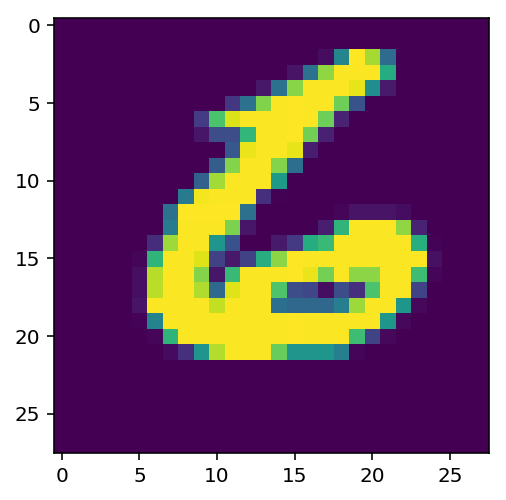

In [13]:
sample = test_x[-1]                  #pull a case from test set
sample = sample.reshape((28,28))         #reshape it to 28x28 pixels
plt.imshow(sample)                    #display the image


In [14]:
sample = sample.reshape((1,784))                 #reshape the train set to 1x784
prediction = model.predict_classes(sample)     #based on the pixel values, predict the number
print("Class: ",prediction)                     #print the prediction

Class:  [6]


In [15]:
#display probabilty of each possible number
(model.predict(sample))

array([[5.5794471e-06, 1.1716567e-10, 1.0247490e-04, 3.5577401e-09,
        1.0932880e-06, 7.5511948e-06, 9.9988306e-01, 1.9907490e-10,
        2.2460331e-07, 8.1029521e-09]], dtype=float32)

<h3>Assignment 2</h3>
Try different cases! Are there numbers that are harder to classify?

Try plotting accuracy and loss for all epochs